Arewa Data Science Academy

Deep Learning Cohort1.0

Name: Abdullahi Ahmad

Email: abdulll8392@gmail.com

Title: Week 3 Solution

In [1]:
import torch

In [70]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

1. Make a binary classification dataset with Scikit-Learn's make_moons() function.

In [72]:
from sklearn.datasets import make_moons #creating dataset using make_moons dataset

In [73]:
#defining the variable for the dataset include number of sample and sample seed
no_sample = 1000
sample_seed = 42

In [74]:
#crating the dataset using makemoons
x,y = make_moons(no_sample,random_state=sample_seed)

In [75]:
# Turn data into a DataFrame
import pandas as pd
data_df = pd.DataFrame({"x0": x[:, 0],
                        "x1": x[:, 1],
                        "y": y})
data_df.head()

,x0,x1,y
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


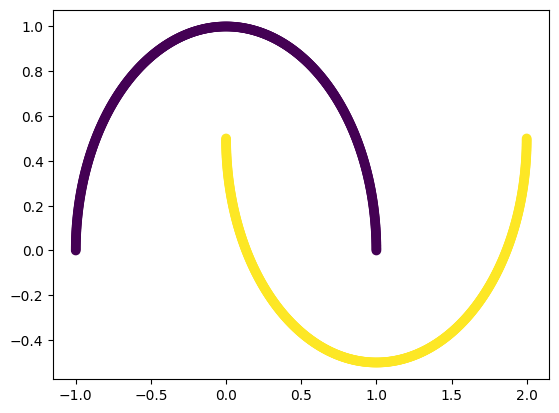

In [76]:
# Visualize the data on a plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y);

In [77]:
# Turn data into tensors of dtype float
x = torch.tensor(x, dtype=torch.float) #turn x into tensor
y = torch.tensor(y, dtype=torch.float) # turning y into tensors

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=sample_seed,train_size=0.8,test_size=0.2)

2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

---



In [79]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self,input_features,hidden_node,output_features):
      super().__init__() #inheritance
      #defining the layers first input,hidden,then last is the output layer
      self.layer1 = nn.Linear(in_features=input_features,
                                 out_features=hidden_node)
      self.layer2 = nn.Linear(in_features=hidden_node,
                                 out_features=hidden_node)
      self.layer3 = nn.Linear(in_features=hidden_node,
                                out_features=output_features)
      self.relu = nn.ReLU() #define the activation function

    def forward(self, x):
        ## Your code here ##
        return  self.layer3(self.relu(self.layer2(self.relu(self.layer1(x))))) #forwad propagation for training the model

# Instantiate the model
## Your code here ##
model= MoonModelV0(input_features=2, #i have 2 input features
                      output_features=1, #i have 1 node at the output layer because is binary classification
                      hidden_node=10).to(device)

In [80]:
#checking the parameters
model

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [81]:
# Setup loss function
loss_function = nn.BCEWithLogitsLoss() #i used binary classification sigmoid
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.

In [82]:
# logits (raw outputs of model)
print("Logits:")
## Your code here ##

# Prediction probabilities
print("Pred probs:")
## Your code here ##
print(torch.sigmoid(model(x_train.to(device)[:4]).squeeze()))

# Prediction labels
print("Pred labels:")
## Your code here ##
print(torch.round(torch.sigmoid(model(x_train.to(device)[:4]).squeeze())))

Logits:
Pred probs:
tensor([0.4686, 0.4651, 0.4601, 0.4595], device='cuda:0',
       grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([0., 0., 0., 0.], device='cuda:0', grad_fn=<RoundBackward0>)


In [20]:
!pip -q install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 5.2 MB/s eta 0:00:00


In [83]:
from torchmetrics import Accuracy
accuracy = Accuracy(task="multiclass", num_classes=2).to(device) # accuracy function


In [49]:
accuracy

MulticlassAccuracy()

In [84]:
## TODO: Uncomment this to set the seed
torch.manual_seed(sample_seed)

# Setup epochs
epochs = 1500 #setting the epoch to 1500

# Send data to the device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)


# Loop through the data
for epoch in range(epochs):
  model.train() #training the model for 1500 epoch


  # 1. Forward pass (logits output)
  y_logits = model(x_train).squeeze()
  # Turn logits into prediction probabilities
  y_pred_probs = torch.sigmoid(y_logits)
  # Turn prediction probabilities into prediction labels
  y_pred = torch.round(y_pred_probs)
  # 2. Calculaute the loss
  loss = loss_function(y_logits, y_train) #calculating the loss between actual input and predicted output
  # Calculate the accuracy
  acc = accuracy(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels
  # 3. Zero the gradients
  optimizer.zero_grad()
  # 4. Loss backward (perform backpropagation)
  loss.backward()
  # 5. Step the optimizer (gradient descent)
  optimizer.step()
  ### Testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(x_test).squeeze()
    test_prediction = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the loss/acc
    test_loss = loss_function(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int())

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x800 and 2x10)